In [ ]:
#Cargando los archivos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data set

Se analizaron datos de promedio global del nivel del mar (GMSL, por sus siglas en inglés) generados por el programa “Sea Level Change” de la NASA. Donde se usaron altímetros de las siguientes misiones: TOPEX/Poseidon, Jason-1, OSTM/Jason-2, Jason-3, and Sentinel-6 Michael Freilich.

Los datos crudos fueron preprocesados por la NASA con un filtro Gaussiano de 60 días y un Ajuste Global Isostático (GIA), removiendo las señales anuales y semianuales innecesarias.(GSFC,2021). Estos datos corresponden a la columna 12 del data set y a la columna 11 en nuestro código por la cuenta de phyton que inicia en 0.

In [ ]:
#Eliminar los espacios en blanco
# Ruta del archivo de texto original
archivo_original = "/content/drive/MyDrive/8° Semestre/Computación y Análisis de datos geofísicos/GMSL_TPJAOS_5.1_199209_202212.txt"

# Ruta del archivo de texto resultante (sin espacios)
archivo_resultante = "/content/drive/MyDrive/8° Semestre/Computación y Análisis de datos geofísicos/Aumento_Nivel_Mar.txt"

# Abrir el archivo original en modo lectura
with open(archivo_original, 'r') as archivo_orig:
    # Leer todas las líneas del archivo
    lineas_orig = archivo_orig.readlines()

# Eliminar espacios en blanco y escribir en el archivo resultante
with open(archivo_resultante, 'w') as archivo_res:
    for linea_orig in lineas_orig:
        # Eliminar los espacios en blanco en la línea
        linea_sin_espacios = ' '.join(linea_orig.split())

        # Escribir la línea sin espacios en el archivo resultante
        archivo_res.write(linea_sin_espacios + '\n')



FileNotFoundError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar datos y omitir las primeras 50 filas que corresponden a los metadatos
gmsl_data =pd.read_csv('/content/drive/MyDrive/8° Semestre/Computación y Análisis de datos geofísicos/Aumento_Nivel_Mar.txt', sep=" ", header = 12,
                 names=["Altimetro",	"Merged file cycle",	"Año",	"# Observaciones"	,"Observaciones calibradas",	"Variación GMSL",	"Desviación Estandar GMSL",	"GMSL Suavizado",	"GMSL 20 Años",	"Desviación Variación",	"Columna 10",	"ANM Variación Gaussiana", "Columna 12"],
                       skiprows=50)
print(gmsl_data)

      Altimetro  Merged file cycle          Año  # Observaciones  \
0             0                 24  1993.364686           454524   
1             0                 25  1993.391852           456091   
2             0                 26  1993.419018           457472   
3             0                 27  1993.446185           454304   
4             0                 28  1993.473351           454640   
...         ...                ...          ...              ...   
1086          0               1111  2022.875116           451629   
1087          0               1112  2022.902282           455163   
1088          0               1113  2022.929448           464703   
1089          0               1114  2022.956614           461317   
1090          0               1115  2022.983780           469371   

      Observaciones calibradas  Variación GMSL  Desviación Estandar GMSL  \
0                    326836.59          -38.80                     86.20   
1                    328100.19 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#CARGAR DATOS
gmsl_data =np.loadtxt('/content/drive/MyDrive/8° Semestre/Computación y Análisis de datos geofísicos/Aumento_Nivel_Mar.txt', skiprows=50, delimiter=" ")
gmsl_data

array([[   0.      ,   11.      , 1993.011526, ...,  -38.78    ,
         -38.56    ,  -38.57    ],
       [   0.      ,   12.      , 1993.038692, ...,  -39.8     ,
         -39.09    ,  -39.1     ],
       [   0.      ,   13.      , 1993.065858, ...,  -39.64    ,
         -38.56    ,  -38.58    ],
       ...,
       [   0.      , 1113.      , 2022.929448, ...,   68.13    ,
          66.23    ,   58.93    ],
       [   0.      , 1114.      , 2022.956614, ...,   68.19    ,
          67.08    ,   59.78    ],
       [   0.      , 1115.      , 2022.98378 , ...,   68.26    ,
          67.86    ,   60.56    ]])

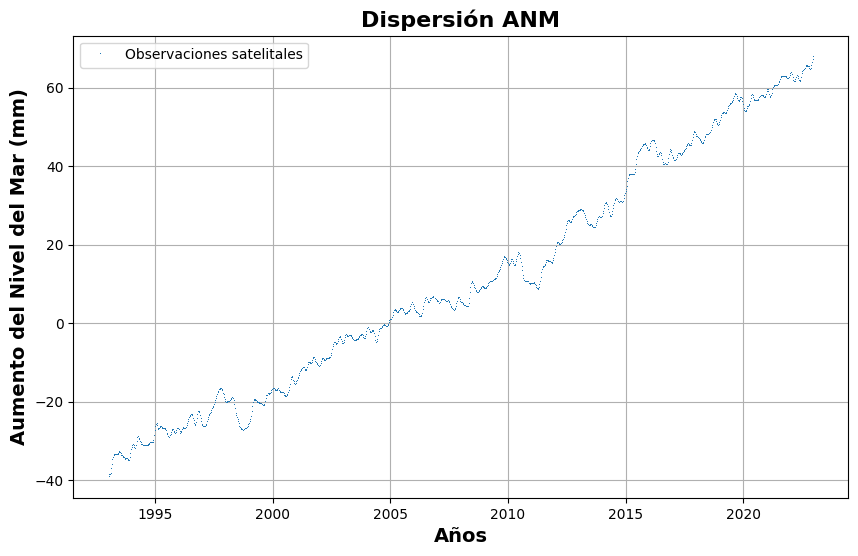

In [ ]:
#GRAFICA DE DISPERSION
plt.figure(figsize=(10,6))
plt.plot(gmsl_data[:,2], gmsl_data[:,11],"," , linewidth=0.01, label='Observaciones satelitales')
plt.grid(True)
plt.xlabel('Años', fontweight='bold', fontsize=14)
plt.ylabel('Aumento del Nivel del Mar (mm)', fontweight='bold', fontsize=14)
plt.title('Dispersión ANM', fontweight='bold', fontsize=16)
plt.legend(loc=2)
plt.savefig('grafica_dispersion.png')
plt.show()

In [ ]:
#COEFICIENTE DE CORRELACIÓN DE PEARSON
correlacion=np.corrcoef(gmsl_data[:,2], gmsl_data[:,11]) #MATRIZ DE CORRELACIÓN
print('Coeficiente de correlación de Pearson p:', np.around(correlacion[0,1],4))

NameError: ignored

Como podemos observar, el Coeficiente de correlación de Pearson es bastante significativo

In [ ]:
#MODELO DE REGRESION LINEAL
#Función polyfit(x,y,n) encuentra los coeficientes de un polinomio de grado n en potencias descendentes
coef=np.polyfit(gmsl_data[:,2], gmsl_data[:,11],1) #1 significa modelo lineal
print('B2=', np.around(coef[0], 4), 'B1=', np.around(coef[1],4))
coef2=np.polyfit(gmsl_data[:,2]-1993, gmsl_data[:,11],1) #Este coeficiente muestra la ordenada al origen como si recorriéramos los ejes
print("B2=",np.around(coef2[0], 4), 'B1 modificada=', np.around(coef2[1],4))

B2= 3.4067 B1= -6829.6591
B2= 3.4067 B1 modificada= -40.1043


B1 es la ordenada al origen y B2 es la pendiente

In [ ]:
#Y ESTIMADAS
ecuacion=np.poly1d(coef)
print("Ecuación =",ecuacion)
y_estimadas=ecuacion(gmsl_data[:,2])
print("y estimada =", y_estimadas)
ecuacion_verdadera = np.poly1d(coef2) #Calcula la ecuación real, es decir, con los valores de nivel del mar reales
print("Ecuación modificada", ecuacion_verdadera)

Ecuación =  
3.407 x - 6830
y estimada = [-40.06499176 -39.97244533 -39.87989889 ...  61.85641879  61.94896523
  62.04151166]
Ecuación modificada  
3.407 x - 40.1


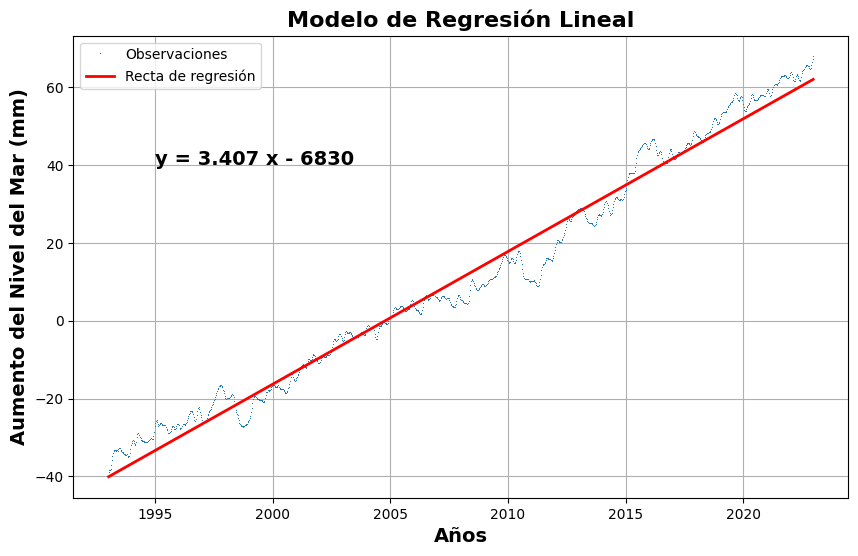

In [ ]:
#GRAFICA DE LOS DATOS Y EL MODELO DE REGRESIÓN CON LA ECUACION NORMAL
plt.figure(figsize=(10,6))
plt.plot(gmsl_data[:,2], gmsl_data[:,11], ',', linewidth=2, label='Observaciones')
plt.plot(gmsl_data[:,2], y_estimadas, '-r', linewidth=2, label='Recta de regresión')
plt.grid(True)
plt.xlabel('Años', fontweight='bold', fontsize=14)
plt.ylabel('Aumento del Nivel del Mar (mm)', fontweight='bold', fontsize=14)
plt.title('Modelo de Regresión Lineal', fontweight='bold', fontsize=16)
cadena_ec=str(ecuacion)
plt.text(1995, 40,'y = '+cadena_ec[2:len(cadena_ec)], fontweight='bold', fontsize=14)
plt.legend(loc=2)
plt.savefig('grafica_dispersion_recta_reg.png')
plt.show()

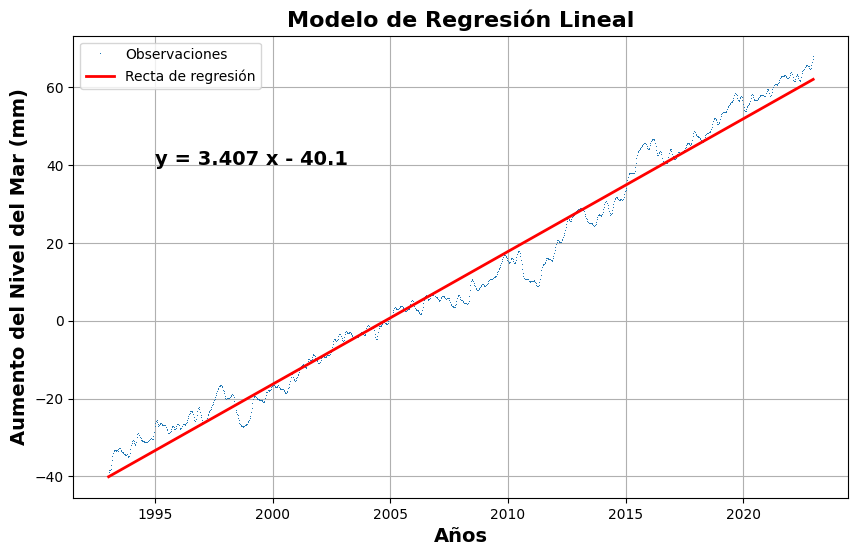

In [ ]:
#GRAFICA DE LOS DATOS Y EL MODELO DE REGRESIÓN CON LA ECUACION MODIFICADA
plt.figure(figsize=(10,6))
plt.plot(gmsl_data[:,2], gmsl_data[:,11], ',', linewidth=2, label='Observaciones')
plt.plot(gmsl_data[:,2], y_estimadas, '-r', linewidth=2, label='Recta de regresión')
plt.grid(True)
plt.xlabel('Años', fontweight='bold', fontsize=14)
plt.ylabel('Aumento del Nivel del Mar (mm)', fontweight='bold', fontsize=14)
plt.title('Modelo de Regresión Lineal', fontweight='bold', fontsize=16)
cadena_ec=str(ecuacion_verdadera)
plt.text(1995, 40,'y = '+cadena_ec[2:len(cadena_ec)], fontweight='bold', fontsize=14)
plt.legend(loc=2)
plt.savefig('grafica_dispersion_recta_reg.png')
plt.show()


In [ ]:
#COEFICIENTE DE DETERMINACION
r_cuadrada=np.around(correlacion[0,1]*correlacion[0,1],4)
print('Coeficiente de determinación:', r_cuadrada)

Coeficiente de determinación: 0.9809


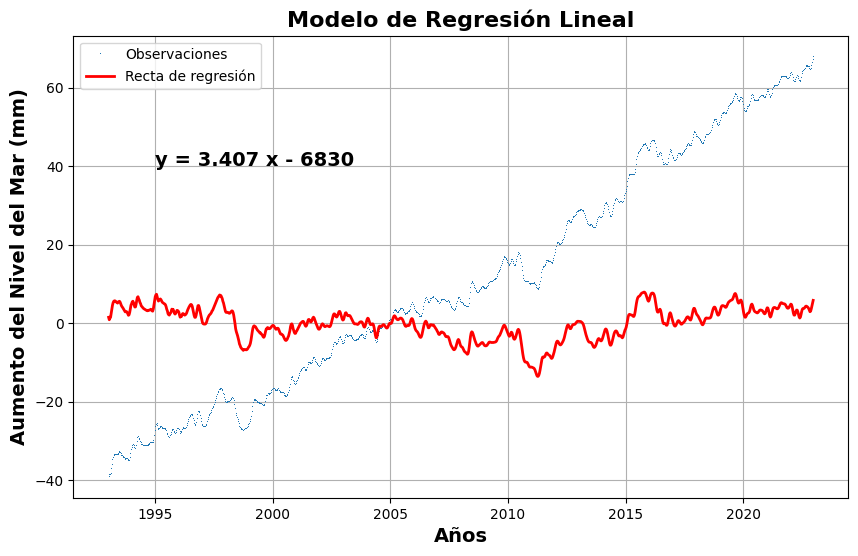

In [ ]:
#Gráfica de residuos
#Prueba fallida
plt.figure(figsize=(10,6))
plt.plot(gmsl_data[:,2], gmsl_data[:,11], ',', linewidth=2, label='Observaciones')
plt.plot(gmsl_data[:,2], gmsl_data[:,11]-y_estimadas, '-r', linewidth=2, label='Recta de regresión')
plt.grid(True)
plt.xlabel('Años', fontweight='bold', fontsize=14)
plt.ylabel('Aumento del Nivel del Mar (mm)', fontweight='bold', fontsize=14)
plt.title('Modelo de Regresión Lineal', fontweight='bold', fontsize=16)
cadena_ec=str(ecuacion)
plt.text(1995, 40,'y = '+cadena_ec[2:len(cadena_ec)], fontweight='bold', fontsize=14)
plt.legend(loc=2)
plt.savefig('grafica_dispersion_recta_reg.png')
plt.show()